## Machine Learning Theroy DA
### Jeevan Yohan Varghese - 20BCE0083

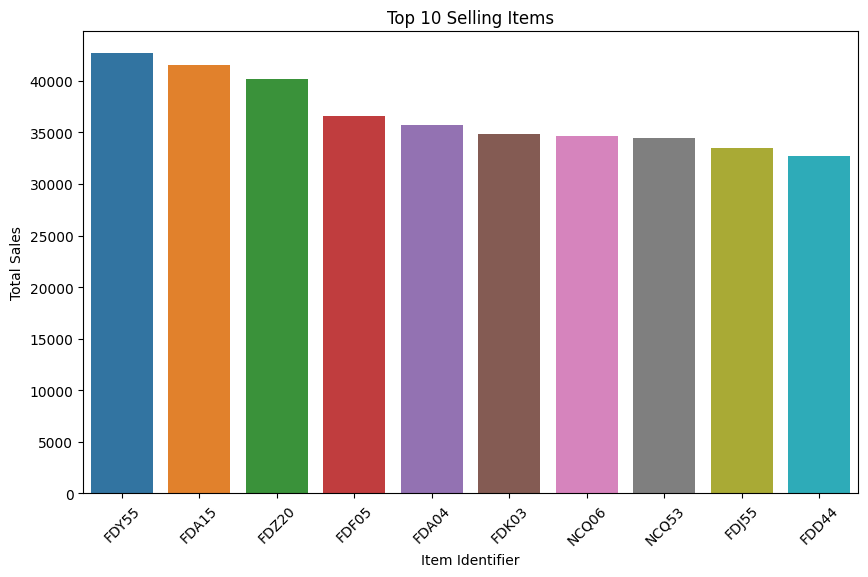

TypeError: DataFrame.sort_values() missing 1 required positional argument: 'by'

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV file
data = pd.read_csv("bigmart_train.csv")

# Data cleaning and preprocessing
# Fill missing values in "Item_Weight" column with average weight of respective "Item_Identifier"
data["Item_Weight"].fillna(data.groupby("Item_Identifier")["Item_Weight"].transform("mean"), inplace=True)

# Fill missing values in "Outlet_Size" column with mode of respective "Outlet_Type"
mode = data.pivot_table(values="Outlet_Size", columns="Outlet_Type", aggfunc=(lambda x: x.mode()[0]))
miss_bool = data["Outlet_Size"].isnull() 
data.loc[miss_bool, "Outlet_Size"] = data.loc[miss_bool, "Outlet_Type"].apply(lambda x: mode[x])

# Create new feature "Outlet_Years" by subtracting "Outlet_Establishment_Year" from current year
from datetime import datetime
now = datetime.now()
data["Outlet_Years"] = now.year - data["Outlet_Establishment_Year"]

# Create bar plot of top 10 selling items
top10_items = data.groupby("Item_Identifier").agg({"Item_Outlet_Sales": np.sum}).sort_values("Item_Outlet_Sales", ascending=False)[:10]
plt.figure(figsize=(10,6))
sns.barplot(x=top10_items.index, y="Item_Outlet_Sales", data=top10_items)
plt.title("Top 10 Selling Items")
plt.xlabel("Item Identifier")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

# Create horizontal bar plot of top 5 performing stores
store_sales = data.pivot_table(index="Outlet_Identifier", values="Item_Outlet_Sales", aggfunc=np.sum)
top5_stores = store_sales.sort_values(ascending=False)[:5]
plt.figure(figsize=(10,6))
sns.barplot(x=top5_stores.values, y=top5_stores.index, orient="h")
plt.title("Top 5 Performing Stores")
plt.xlabel("Total Sales")
plt.ylabel("Store Identifier")
plt.show()

# Create box plot of profitability by outlet type
data["Profit"] = data["Item_Outlet_Sales"] - data["Item_MRP"]
plt.figure(figsize=(10,6))
sns.boxplot(x="Outlet_Type", y="Profit", data=data)
plt.title("Profitability by Outlet Type")
plt.xlabel("Outlet Type")
plt.ylabel("Profit")
plt.show()
